In [1]:
from pathlib import Path

import numpy as np
import pyvista as pv
from aicsimageio import AICSImage


pv.set_jupyter_backend("static")

datadir = Path("../data/confocal")

In [2]:
img = AICSImage(datadir / "2_T32DN_denervated_desmin stainig_40X_DESMIN_image3.tif")

In [3]:
img_data = img.get_image_data("XYZ", T=0, C=0)
pixel_sizes = (
    img.physical_pixel_sizes.X,
    img.physical_pixel_sizes.Y,
    img.physical_pixel_sizes.Y,
)

In [43]:
img.physical_pixel_sizes.X * img_data.shape[0]

222.16358839050133

In [33]:
img.physical_pixel_sizes.Y * img_data.shape[1]

187.86279683377307

In [4]:
np.array(img_data.shape) + 1

array([843, 713,   2])

In [5]:
grid = pv.ImageData(dimensions=np.array(img_data.shape) + 1, spacing=pixel_sizes)
grid.cell_data["desmin"] = img_data.flatten(order="F")

In [56]:
grid

ImageData (0x147362c5ca60)
  N Cells:      599504
  N Points:     1202118
  X Bounds:     0.000e+00, 2.222e+02
  Y Bounds:     0.000e+00, 1.879e+02
  Z Bounds:     0.000e+00, 2.639e-01
  Dimensions:   843, 713, 2
  Spacing:      2.639e-01, 2.639e-01, 2.639e-01
  N Arrays:     1

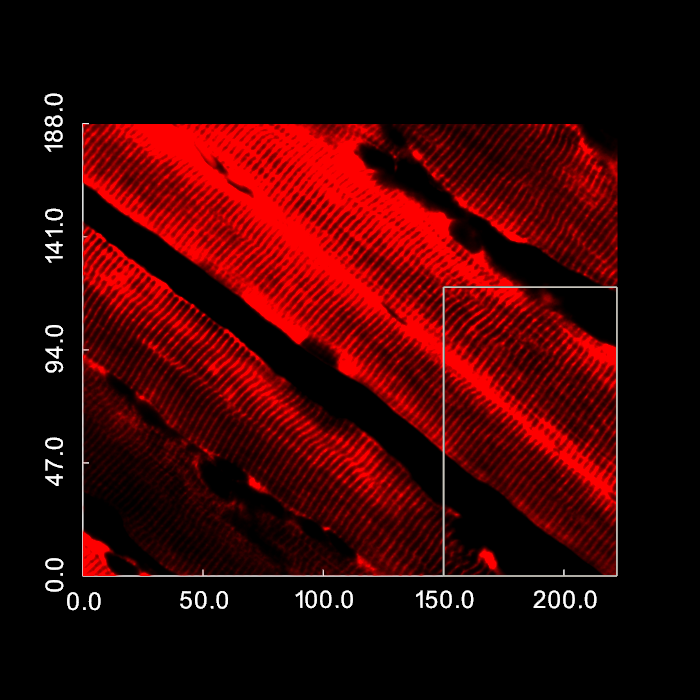

In [107]:
pl = pv.Plotter(notebook=True, window_size=(700, 700))
actor = pl.add_volume(
    grid,
    cmap=["#FF0000"],
    opacity=[0.0, 0.1, 1.0],
    clim=(0, 96),
    blending="maximum",
    show_scalar_bar=False,
)
actor.prop.interpolation_type = "linear"
pl.set_background(color="black")
pl.enable_parallel_projection()


pl.view_xy()

rect = pv.Rectangle([[150, 0, 1.0], [222, 120, 1.0], [150, 120, 1.0]])

pl.add_mesh(
    rect,
    show_edges=True,
    style="wireframe",
    color="white",
    edge_color="white",
    line_width=1.5,
    opacity=1.0,
)

axis = pl.show_bounds(
    color="white",
    bounds=[0, 200, 0, 188, 0, 0],
    grid=None,
    bold=False,
    font_size=18,
    font_family="arial",
    padding=0.0,
    use_3d_text=False,
    show_zaxis=False,
    xtitle="",
    ytitle="",
)

pl.show()
pl.save_graphic("../figures/fig_1/overview.svg")

In [91]:
x_vals = np.arange(img_data.shape[0]) * img.physical_pixel_sizes.X
y_vals = np.arange(img_data.shape[1]) * img.physical_pixel_sizes.Y
img_data_subset = img_data[x_vals >= 150][:, y_vals <= 120]

grid_subset = pv.ImageData(
    dimensions=np.array(img_data_subset.shape) + 1,
    spacing=pixel_sizes,
    origin=(150, 0, 0),
)
grid_subset.cell_data["desmin"] = img_data_subset.flatten(order="F")

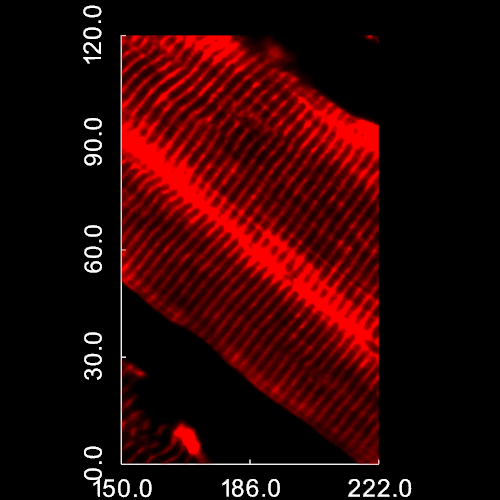

In [111]:
pl = pv.Plotter(notebook=True, window_size=(500, 500))
actor = pl.add_volume(
    grid_subset,
    cmap=["#FF0000"],
    opacity=[0.0, 0.1, 1.0],
    clim=(0, 96),
    blending="maximum",
    show_scalar_bar=False,
)
actor.prop.interpolation_type = "linear"
pl.set_background(color="black")
pl.enable_parallel_projection()


pl.view_xy()

axis = pl.show_bounds(
    color="white",
    axes_ranges=[150, 222, 0, 120, 0, 0],
    grid=None,
    bold=False,
    font_size=18,
    font_family="arial",
    padding=0.0,
    use_3d_text=False,
    show_zaxis=False,
    n_xlabels=3,
    xtitle="",
    ytitle="",
)

pl.show()
pl.save_graphic("../figures/fig_1/roi.svg")

In [86]:
(x_vals >= 150).shape

(842,)

In [ ]:
x_vals[x_vals >= 150]

array([150.13192612, 150.39577836, 150.65963061, 150.92348285,
       151.18733509, 151.45118734, 151.71503958, 151.97889182,
       152.24274406, 152.50659631, 152.77044855, 153.03430079,
       153.29815303, 153.56200528, 153.82585752, 154.08970976,
       154.35356201, 154.61741425, 154.88126649, 155.14511873,
       155.40897098, 155.67282322, 155.93667546, 156.2005277 ,
       156.46437995, 156.72823219, 156.99208443, 157.25593668,
       157.51978892, 157.78364116, 158.0474934 , 158.31134565,
       158.57519789, 158.83905013, 159.10290237, 159.36675462,
       159.63060686, 159.8944591 , 160.15831135, 160.42216359,
       160.68601583, 160.94986807, 161.21372032, 161.47757256,
       161.7414248 , 162.00527704, 162.26912929, 162.53298153,
       162.79683377, 163.06068602, 163.32453826, 163.5883905 ,
       163.85224274, 164.11609499, 164.37994723, 164.64379947,
       164.90765172, 165.17150396, 165.4353562 , 165.69920844,
       165.96306069, 166.22691293, 166.49076517, 166.75

In [67]:
subset_inds = grid.find_cells_within_bounds([0, 200, 0, 188, -1, 1])
subset = grid.extract_cells(subset_inds)
subset

UnstructuredGrid (0x147308365ba0)
  N Cells:    540408
  N Points:   1083760
  X Bounds:   0.000e+00, 2.003e+02
  Y Bounds:   0.000e+00, 1.879e+02
  Z Bounds:   0.000e+00, 2.639e-01
  N Arrays:   3

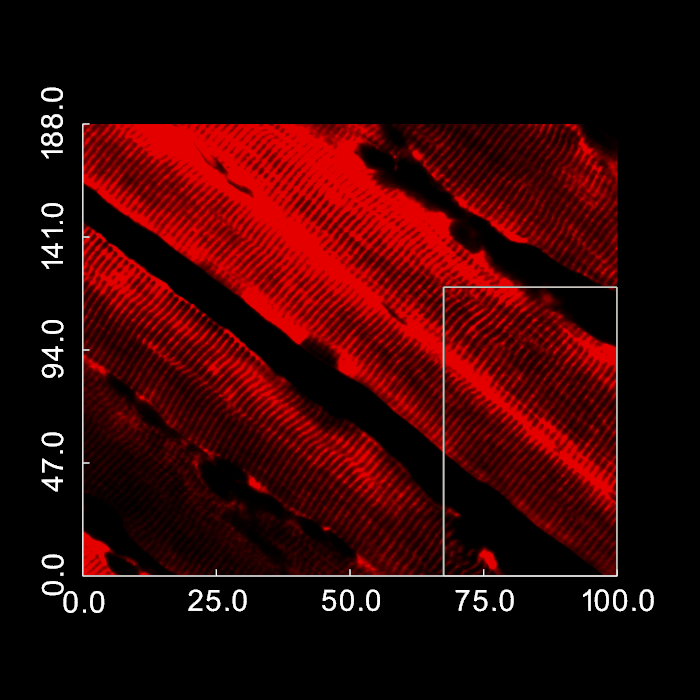

In [78]:
pl = pv.Plotter(notebook=True, window_size=(700, 700))
actor = pl.add_volume(
    grid,
    cmap=["#FF0000"],
    opacity=[0.0, 0.1, 0.9],
    clim=(0, 96),
    blending="maximum",
    show_scalar_bar=False,
)
actor.prop.interpolation_type = "linear"
pl.set_background(color="black")
pl.enable_parallel_projection()


pl.view_xy()

rect = pv.Rectangle([[150, 0, 1.0], [222, 120, 1.0], [150, 120, 1.0]])

pl.add_mesh(
    rect,
    show_edges=True,
    style="wireframe",
    color="white",
    edge_color="white",
    line_width=1.5,
    opacity=1.0,
)

axis = pl.show_bounds(
    color="white",
    axes_ranges=[0, 100, 0, 188, 0, 0],
    grid=None,
    bold=False,
    font_size=22,
    font_family="arial",
    padding=0.0,
    use_3d_text=False,
    show_zaxis=False,
    xtitle="",
    ytitle="",
)

pl.show()